Importations

In [1]:
import numpy as np
import scipy
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import importlib

In [2]:
np.random.seed(0)
colors = ('indianred','darkorange','gold','lime','turquoise','royalblue','blueviolet','magenta')
%matplotlib notebook

In [3]:
from fcts_aff_anal import *

Importations des données

In [4]:
nb_neurones = 100

In [5]:
# input array  (3 channels)
x_test_array = np.loadtxt('Data/x_test_array.gz')
# expected output array (3 channels)
y_test_array = np.loadtxt('Data/y_test_array.gz')

# loss over time for random_seed = 7 and time_delay = 0
s7d0_loss = np.loadtxt('Data/s7d0_loss.gz')
# output during testing
s7d0_output = np.loadtxt('Data/s7d0_output.gz')
# states of neurons during testing
s7d0_states = np.loadtxt('Data/s7d0_states.gz')
# w matrix (or strengths of neurons connections)
#s7d0_w = np.loadtxt('Data/s7d0_w.gz')
# wout matrix
#s7d0_wout = np.loadtxt('Data/s7d0_wout.gz')

# same for random_seed = 7 and time_delay = 4
s7d4_loss = np.loadtxt('Data/s7d4_loss.gz')
s7d4_output = np.loadtxt('Data/s7d4_output.gz')
s7d4_states = np.loadtxt('Data/s7d4_states.gz')
#s7d4_w = np.loadtxt('Data/s7d4_w.gz')
#s7d4_wout = np.loadtxt('Data/s7d4_wout.gz')

# same for random_seed = 7 and time_delay = 8
s7d8_loss = np.loadtxt('Data/s7d8_loss.gz')
s7d8_output = np.loadtxt('Data/s7d8_output.gz')
s7d8_states = np.loadtxt('Data/s7d8_states.gz')
#s7d8_w = np.loadtxt('Data/s7d8_w.gz')
#s7d8_wout = np.loadtxt('Data/s7d8_wout.gz')

# win matrix for random_seed = 7 and all time delays
#s7_win = np.loadtxt('Data/s7_win.gz')

In [6]:
# possible switches by index
switch = np.array([[0,1],[0,2],[0,4],[1,3],[1,5],[2,3],[2,6],[3,7],[4,5],[4,6],[5,7],[6,7]])

Task Definition

In [7]:
fig,(ax1) = plt.subplots(1,1,sharex=True,figsize=(8,2.5))
# Expected output
ax1.plot(y_test_array[:500,0],'k')
# Input
ax1.plot(x_test_array[:500,0],'r')

ax1.set_ylabel('Tension')
ax1.set_xlabel('Elapsed time steps')
custom_legend = [Line2D([0], [0], color='r', label='Input'),
                Line2D([0], [0], color='k', label='Expected output')]
ax1.legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(.5,1.3), ncol=2)

fig.tight_layout()

<IPython.core.display.Javascript object>

In [8]:
fig,(ax1) = plt.subplots(1,1,sharex=True,figsize=(8,2.5))
# Setting delay for the demonstration's purpose
delay = 7
# Expected output
ax1.plot(y_test_array[:500,0],'k')
# Input
ax1.plot(x_test_array[delay:500+delay,0],'r')
# Visualisation of delay
ax1.set_yticks([-1,0,1])
for i in np.where(np.abs(np.round((y_test_array[0:499,0]-x_test_array[1:500,0])))==2)[0] :
    ax1.axvspan(i-delay+1,i,color='lightgrey')

ax1.set_ylabel('Tension')
ax1.set_xlabel('Elapsed time steps')
custom_legend = [Line2D([0], [0], color='r', label='Input'),
                Line2D([0], [0], color='k', label='Expected output'),
                mpl.patches.Patch(facecolor='lightgrey', edgecolor='lightgrey', label='Duration of delay')]
ax1.legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(.5,1.3), ncol=3)

fig.tight_layout()

<IPython.core.display.Javascript object>

Elementary case

In [9]:
# Simple pca analysis of the test for random_seed=7 and time_delay=0

s7d0_pca = PCA(n_components=3)
s7d0_pca.fit(s7d0_states)
s7d0_pc1, s7d0_pc2, s7d0_pc3 = s7d0_pca.transform(s7d0_states).T

s7d0_out_type = np.array([tension_to_index(out) for out in s7d0_output])

<IPython.core.display.Javascript object>


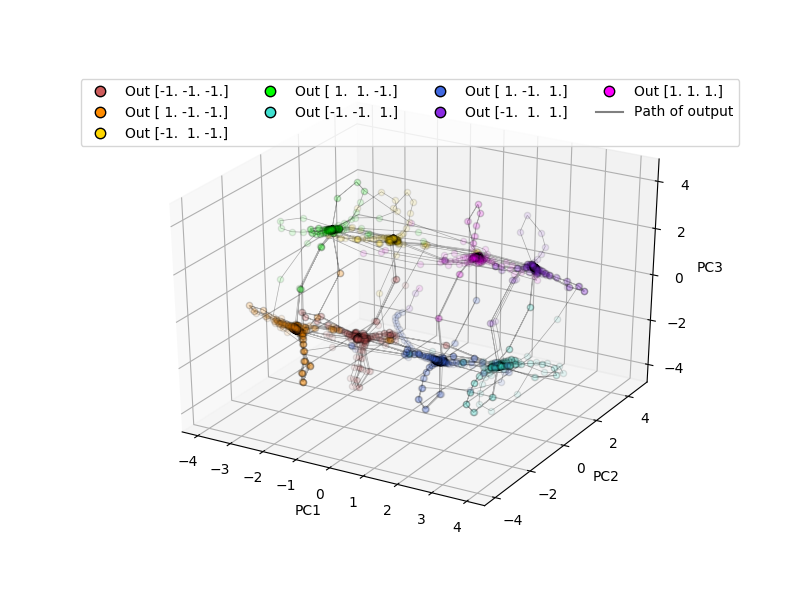

Text(0.5,0,'PC3')

In [27]:
# Drawing of pca analysis

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

#
for i in range(3000):
    ax.scatter(s7d0_pc1[i], s7d0_pc2[i], s7d0_pc3[i], c=colors[s7d0_out_type[i]], edgecolors='k', alpha=0.1)

ax.plot(s7d0_pc1[:3000], s7d0_pc2[:3000], s7d0_pc3[:3000], '-k', linewidth=0.5, alpha=0.3)

custom_legend = [
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[0], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(0))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[1], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(1))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[2], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(2))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[3], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(3))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[4], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(4))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[5], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(5))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[6], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(6))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[7], markeredgecolor='k', marker = '.', label = 'Out '+str(index_to_tension(7))),
    Line2D([0], [0], color = 'gray', label = 'Path of output')
]
ax.legend(handles = custom_legend, loc=9, ncol=4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [12]:
# Calculating approximate cube
s7d0_center_array = []
for i in range(8):
    indexes = np.where(np.equal(s7d0_out_type,i*np.ones(len(s7d0_out_type))))[0]
    s7d0_center= np.mean(s7d0_states[indexes],axis=0)
    s7d0_center_array.append(s7d0_center)
s7d0_center_array = np.array(s7d0_center_array)

cube = s7d0_center_array[switch]

<IPython.core.display.Javascript object>


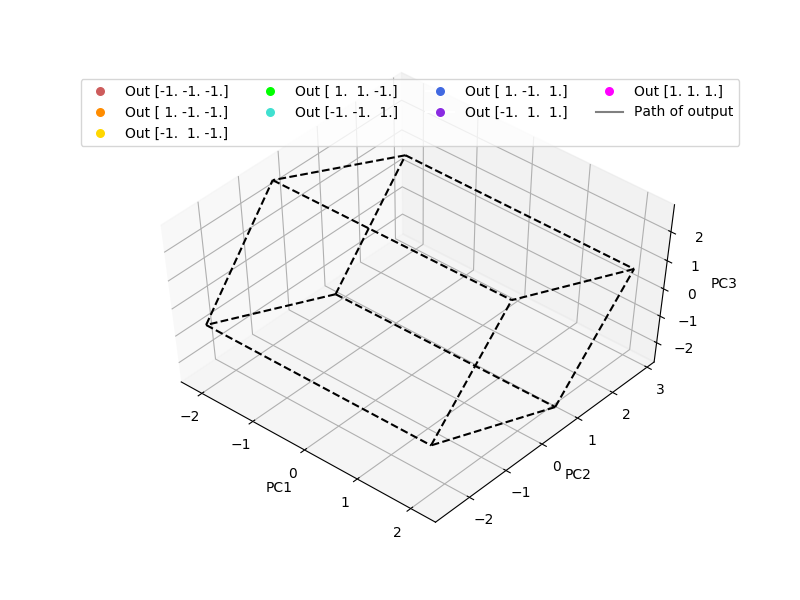

Text(0.5,0,'PC3')

In [17]:
nb = 3000
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for edge in cube:
    edge_pc1, edge_pc2, edge_pc3 = s7d0_pca.transform(edge).T
    ax.plot(edge_pc1, edge_pc2, edge_pc3, 'k--')

custom_legend = [
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[0], marker = '.', label = 'Out '+str(index_to_tension(0))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[1], marker = '.', label = 'Out '+str(index_to_tension(1))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[2], marker = '.', label = 'Out '+str(index_to_tension(2))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[3], marker = '.', label = 'Out '+str(index_to_tension(3))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[4], marker = '.', label = 'Out '+str(index_to_tension(4))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[5], marker = '.', label = 'Out '+str(index_to_tension(5))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[6], marker = '.', label = 'Out '+str(index_to_tension(6))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[7], marker = '.', label = 'Out '+str(index_to_tension(7))),
    Line2D([0], [0], color = 'gray', label = 'Path of output')
]
ax.legend(handles = custom_legend, loc=9, ncol=4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Triggered average analysis

In [ ]:
time_delay = 0
nb_before = time_delay+10
nb_after = 11
pattern = np.concatenate((np.ones(nb_before)*tension_to_index([1,1,1]),np.ones(nb_after)*tension_to_index([1,1,-1]))).astype('int')
triggered_indexes = matchPattern(s7d0_out_type,pattern)
triggered_indexes = np.array([np.arange(i,i+nb_before+nb_after) for i in triggered_indexes])
triggered_states = np.mean(s7d0_states[triggered_indexes],axis=0)

In [ ]:
triggered_pca = PCA(3)
triggered_pca.fit(triggered_states)
triggered_pc_1, triggered_pc_2, triggered_pc_3 = triggered_pca.transform(triggered_states).T

In [ ]:
nb = len(triggered_pc_1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(nb):
    ax.scatter(triggered_pc_1[i], triggered_pc_2[i], triggered_pc_3[i], c=colors[pattern[i]], alpha=0.3)
ax.plot(triggered_pc_1[:nb], triggered_pc_2[:nb], triggered_pc_3[:nb], '-k', linewidth=0.5, alpha=0.3)

for s in switch:
    edge = np.array([center_array[s[0]],center_array[s[1]]])
    ax.plot(triggered_pca.transform(edge).T[0],triggered_pca.transform(edge).T[1],triggered_pca.transform(edge).T[2],'k--',lw=1)

for edge in cube:
    ax.plot(triggered_pca.transform(edge).T[0], triggered_pca.transform(edge).T[1], triggered_pca.transform(edge).T[2], 'r--')
    
custom_legend = [
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[0], marker = '.', label = 'Out '+str(index_to_tension(0))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[1], marker = '.', label = 'Out '+str(index_to_tension(1))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[2], marker = '.', label = 'Out '+str(index_to_tension(2))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[3], marker = '.', label = 'Out '+str(index_to_tension(3))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[4], marker = '.', label = 'Out '+str(index_to_tension(4))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[5], marker = '.', label = 'Out '+str(index_to_tension(5))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[6], marker = '.', label = 'Out '+str(index_to_tension(6))),
    Line2D([0], [0], color = 'w', markersize = 15, markerfacecolor = colors[7], marker = '.', label = 'Out '+str(index_to_tension(7))),
    Line2D([0], [0], color = 'gray', label = 'Path of output'),
    Line2D([0], [0], color = 'k', label = 'Approximate cube')
]
ax.legend(handles = custom_legend, loc=9, ncol=4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(nb):
    ax.scatter(triggered_pc_1[i], triggered_pc_2[i], triggered_pc_3[i], c=colors[pattern[i]], alpha=0.3)
ax.plot(pca.transform(triggered_states).T[0], pca.transform(triggered_states).T[1], pca.transform(triggered_states).T[2], '-k', linewidth=0.5, alpha=0.3)

for s in switch:
    edge = np.array([center_array[s[0]],center_array[s[1]]])
    ax.plot(pca.transform(edge).T[0],pca.transform(edge).T[1],pca.transform(edge).T[2],'k--',lw=1)

custom_legend = [
    Line2D([0], [0], color = 'k--', lw=1, label = 'Approximate cube')
]
ax.legend(handles = custom_legend, loc=9, ncol=4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')